<h1 align="center">📊EXPLORATORY DATA ANALYSIS📊</h1>
<h2 align="center">✈️ON AIRLINE FLIGHT DATA✈️</h2>
<hr>

<h3 align="center">🔍 Key Bussiness Questions Answered</h3>

<div style="text-align: center;">
  <h4 style="margin: 4px 0;">Q1. Which airline has the highest average flight duration?</h4>
  <h4 style="margin: 4px 0;">Q2. Which source–destination city pairs have the longest average duration?</h4>
  <h4 style="margin: 4px 0;">Q3. How many flights are recorded per airline and class (Business vs Economy)?</h4>
  <h4 style="margin: 4px 0;">Q4. Which time of day (Departure Time) has the longest average durations?</h4>
  <h4 style="margin: 4px 0;">Q5. Which airlines operate the least unique routes?</h4>
  <h4 style="margin: 4px 0;">Q6. Do non-stop flights cost more than connecting ones for the same route?</h4>
  <h4 style="margin: 4px 0;">Q7. What are the top 5 most frequent flight routes?</h4>
  <h4 style="margin: 4px 0;">Q8. Which source cities have the most departures?</h4>
  <h4 style="margin: 4px 0;">Q9. Do last-minute bookings (low days left) cost more than early bookings?</h4>
  <h4 style="margin: 4px 0;">Q10. Do certain airlines dominate specific routes or regions?</h4>
</div>


<hr>


## Importing modules and Data Cleaning

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the csv file using pandas
flight_df = pd.read_csv(r"C:\Users\JITHIN\OneDrive\Desktop\Bootcamp\Bootcamp_Labs\week_3\Project_2_EDA_SQL\Datasets\airlines_flights_data.csv")

In [153]:
flight_df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
# Exploring column names (to check if any columns need to be renamed)
flight_df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
# Checking for any null or NaN values in the dataset
flight_df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
# Understanding the airline column in the dataset(which will be the main focus point of the analysis)
# With this we can get all the airline names from the dataset
print("List of Airlines in the Dataset : ",flight_df["airline"].unique())
# Gives the total number of airlines available 
print("Total number of Airlines : ",len(flight_df["airline"].unique()))

List of Airlines in the Dataset :  ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Total number of Airlines :  6


# Q1 - Which airline has the highest average flight duration?

In [ ]:
# Using group by function to analyse the two columns and .mean() get the average duration
avg_duration = flight_df.groupby("airline")["duration"].mean()
avg_duration.sort_values(ascending=False)

airline
Air_India    15.504235
Vistara      13.326634
SpiceJet     12.579767
AirAsia       8.941714
GO_FIRST      8.755380
Indigo        5.795197
Name: duration, dtype: float64

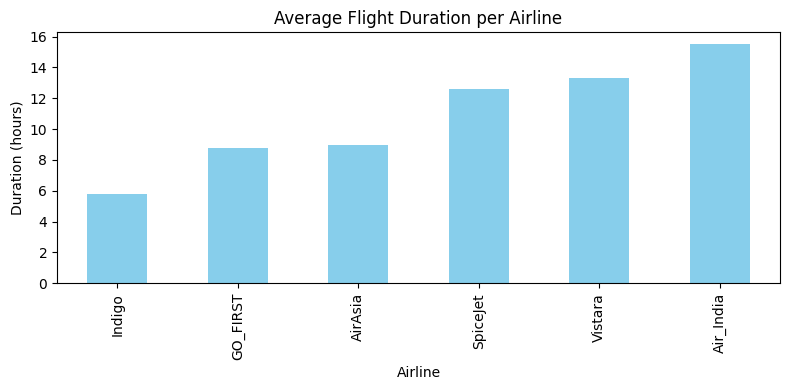

In [ ]:
#plotting the graph
plt.figure(figsize=(8, 4))
avg_duration.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Flight Duration per Airline')
plt.xlabel('Airline')
plt.ylabel('Duration (hours)')
plt.tight_layout()
plt.show()

## As we can see Air India has the highest avg Flight duration between destinations , But to verify lets check if the total flight duration of Air India is still higher

In [ ]:
#Summing up the total operational hours for each airline
total_flight_hours = flight_df.groupby("airline")["duration"].sum()
total_flight_hours.sort_values(ascending=False)

airline
Vistara      1703930.16
Air_India    1254168.60
Indigo        249888.88
GO_FIRST      202888.42
AirAsia       143943.72
SpiceJet      113356.28
Name: duration, dtype: float64

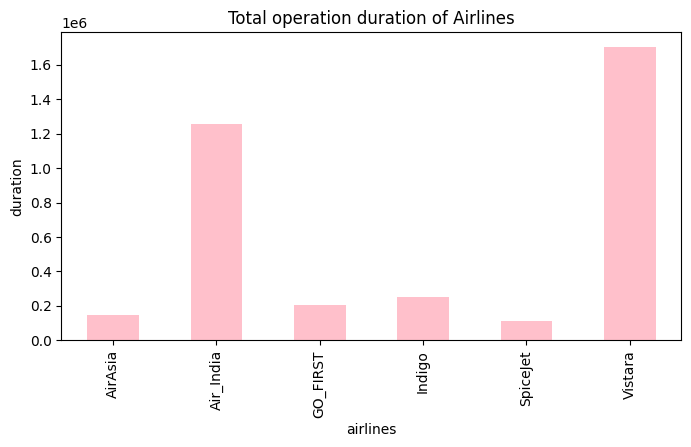

In [159]:
plt.figure(figsize=(8,4))
total_flight_hours.plot(kind = "bar", color= "pink")
plt.title("Total operation duration of Airlines")
plt.xlabel("airlines")
plt.ylabel("duration")
plt.show()

### But here we can see that Vistara has the highest total Operation duration. 

In [160]:
Operation_count = flight_df["airline"].value_counts()
Operation_count

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

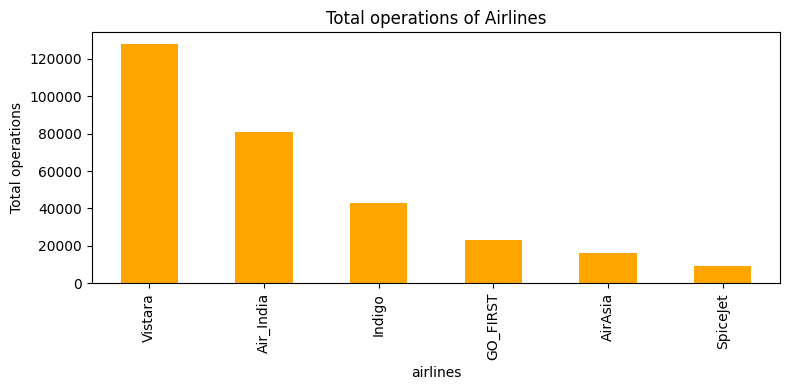

In [161]:
plt.figure(figsize=(8,4))
Operation_count.plot(kind = "bar", color= "orange")
plt.title("Total operations of Airlines")
plt.xlabel("airlines")
plt.ylabel("Total operations")
plt.tight_layout()
plt.show()

# Q2 Which source–destination city pairs have the longest average duration?

In [162]:
flight_df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [163]:
Longest_avgdur_pair = flight_df.groupby(["source_city","destination_city"])["duration"].mean().unstack()

In [164]:
Longest_avgdur_pair_v = flight_df.groupby(["source_city","destination_city"])["duration"].mean()
Longest_avgdur_pair_v.sort_values(ascending=False).head(20)

source_city  destination_city
Kolkata      Chennai             14.774182
Chennai      Kolkata             14.515774
Bangalore    Chennai             14.480207
             Hyderabad           14.162433
Chennai      Bangalore           13.952594
Kolkata      Hyderabad           13.853108
             Bangalore           13.792947
Hyderabad    Kolkata             13.535322
             Chennai             13.293238
Mumbai       Hyderabad           13.263310
Chennai      Hyderabad           13.153985
Bangalore    Kolkata             13.099143
Kolkata      Mumbai              12.991933
Mumbai       Kolkata             12.836848
Delhi        Kolkata             12.735966
Mumbai       Chennai             12.665900
Delhi        Hyderabad           12.518350
             Chennai             12.433965
Chennai      Mumbai              12.374656
Hyderabad    Bangalore           12.093317
Name: duration, dtype: float64

In [165]:
Longest_avgdur_pair_v.sort_values().head()

source_city  destination_city
Bangalore    Delhi                9.779956
Mumbai       Delhi                9.818057
Delhi        Bangalore           10.354125
             Mumbai              10.367774
Hyderabad    Delhi               10.829817
Name: duration, dtype: float64

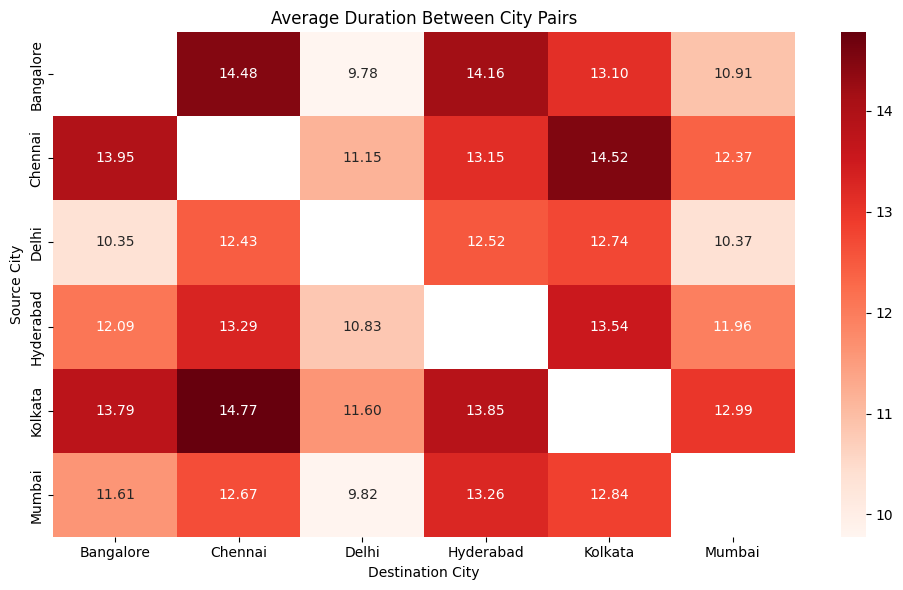

In [166]:
plt.figure(figsize=(10, 6))
sns.heatmap(Longest_avgdur_pair, annot=True, fmt=".2f", cmap="Reds")
plt.title("Average Duration Between City Pairs")
plt.ylabel("Source City")
plt.xlabel("Destination City")
plt.tight_layout()
plt.show()


In [167]:
Longest_avgdur_pair_test = flight_df.groupby(["source_city","destination_city","stops"])["duration"].mean()

In [168]:
Longest_avgdur_pair_test.sort_values()

source_city  destination_city  stops      
Bangalore    Chennai           zero            1.044125
Chennai      Bangalore         zero            1.138333
Bangalore    Hyderabad         zero            1.222717
Chennai      Hyderabad         zero            1.229007
Hyderabad    Bangalore         zero            1.238432
                                                ...    
             Mumbai            two_or_more    18.594426
Bangalore    Chennai           two_or_more    19.631352
Mumbai       Bangalore         two_or_more    19.736306
Kolkata      Chennai           two_or_more    19.841795
Bangalore    Hyderabad         two_or_more    23.007812
Name: duration, Length: 90, dtype: float64

In [169]:
Longest_avgdur_pair_test = flight_df.groupby(["source_city","destination_city","stops"])["duration"].mean().unstack()

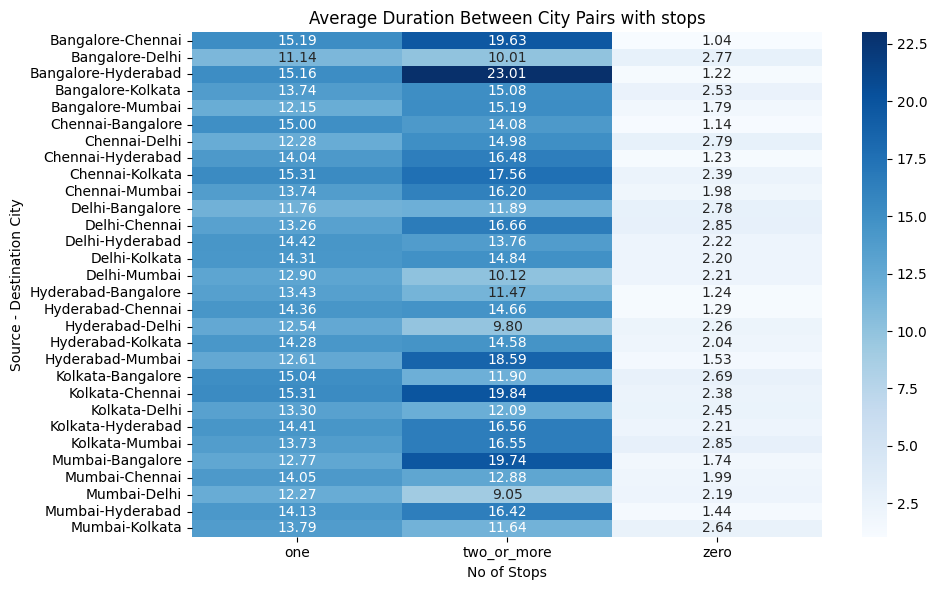

In [170]:
plt.figure(figsize=(10, 6))
sns.heatmap(Longest_avgdur_pair_test, annot=True, fmt=".2f", cmap="Blues")
plt.title("Average Duration Between City Pairs with stops")
plt.ylabel("Source - Destination City")
plt.xlabel("No of Stops")
plt.tight_layout()
plt.show()

In [171]:
stops_count = flight_df.groupby(["source_city", "destination_city", "stops"]).size()
stops_count.head(10)

source_city  destination_city  stops      
Bangalore    Chennai           one             5427
                               two_or_more      503
                               zero             480
             Delhi             one            11329
                               two_or_more      216
                               zero            2211
             Hyderabad         one             7627
                               two_or_more      425
                               zero             876
             Kolkata           one             8586
dtype: int64

In [172]:
# # Set display option to show all rows
# pd.set_option('display.max_rows', None)

# # Now display the DataFrame
# print(stops_count)

<!-- Insights  -->

# Q3 How many flights are recorded per airline and class (Business vs Economy)?

In [173]:
flight_class_count =flight_df.groupby(['airline', 'class'])['flight'].count()
flight_class_count

airline    class   
AirAsia    Economy     16098
Air_India  Business    32898
           Economy     47994
GO_FIRST   Economy     23173
Indigo     Economy     43120
SpiceJet   Economy      9011
Vistara    Business    60589
           Economy     67270
Name: flight, dtype: int64

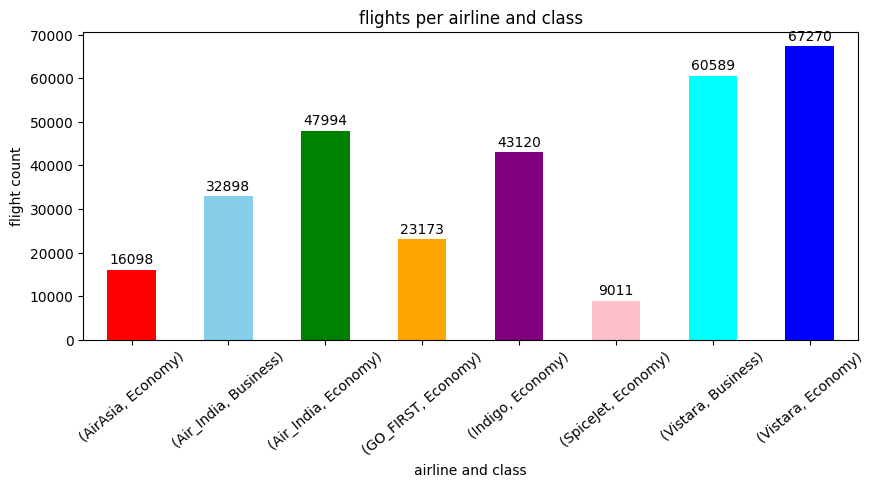

In [450]:
colors = ['red', 'skyblue', 'green', 'orange', 'purple', 'pink', 'cyan','blue']
plt.figure(figsize=(10,4))
ax = flight_class_count.plot(kind="bar", color = colors)
plt.title("flights per airline and class")
plt.ylabel("flight count")
plt.xlabel("airline and class")
ax.bar_label(ax.containers[0], padding=2)
plt.xticks(rotation = 40)
# plt.tight_layout()
plt.show()

# Q4 Which time of day (Departure Time) has the longest average durations?

In [175]:
duration_by_deptime = flight_df.groupby(["departure_time"])["duration"].mean().sort_values(ascending=False)


In [176]:
duration_by_deptime

departure_time
Night            14.123963
Evening          13.642493
Early_Morning    11.587945
Morning          11.303808
Afternoon        10.757008
Late_Night        7.320383
Name: duration, dtype: float64

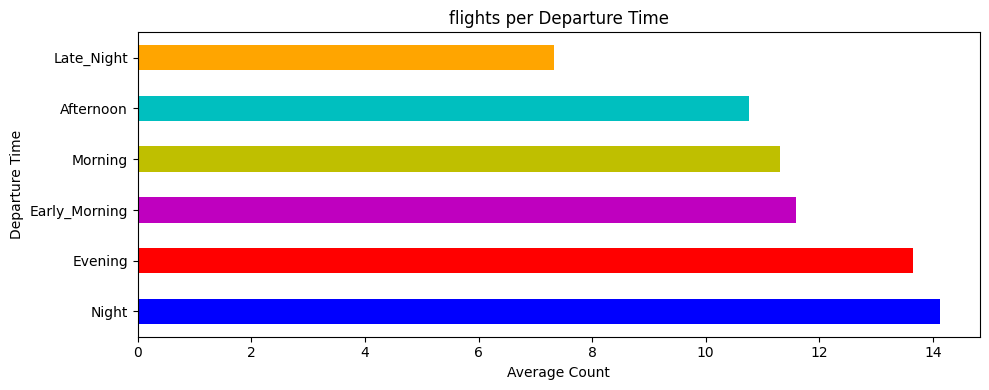

In [457]:
colors_2 = ['b', 'r', 'm', 'y', 'c', 'orange']
plt.figure(figsize=(10,4))
duration_by_deptime.plot(kind="barh", color= colors_2)
plt.title("flights per Departure Time")
plt.ylabel("Departure Time")
plt.xlabel("Average Count")
plt.tight_layout()
plt.show()

In [192]:
duration_by_deptime_count = flight_df.groupby(["departure_time"])["airline"].count().sort_values(ascending=False)

In [193]:
duration_by_deptime_count

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: airline, dtype: int64

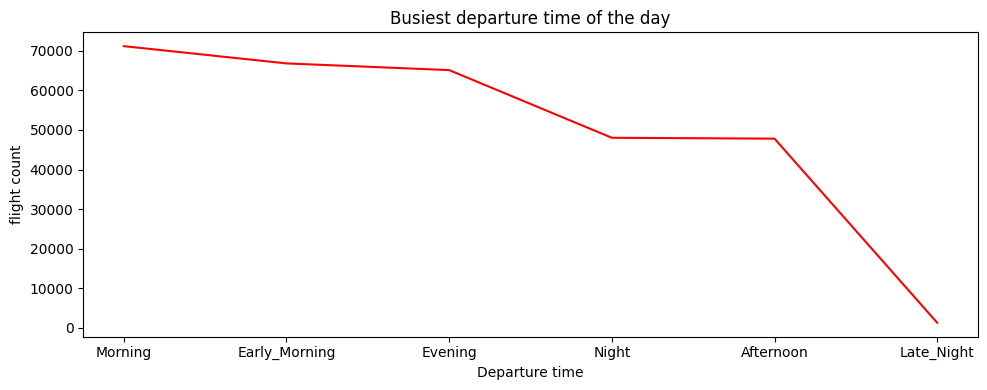

In [460]:
plt.figure(figsize=(10,4))
duration_by_deptime_count.plot(kind="line",color = "r")
plt.title("Busiest departure time of the day")
plt.ylabel("flight count")
plt.xlabel("Departure time")
plt.tight_layout()
plt.show()

In [181]:
busier_origin_city = flight_df.groupby(["source_city","departure_time"]).size().unstack()
busier_origin_city

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


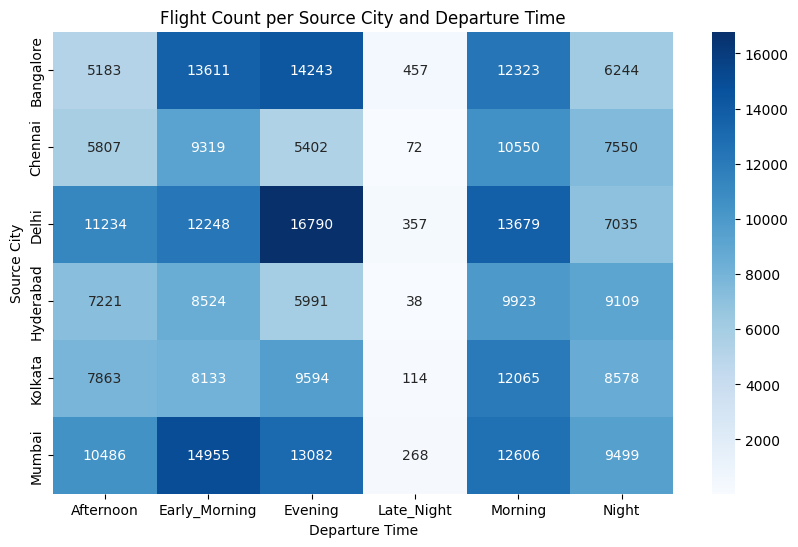

In [182]:
plt.figure(figsize=(10,6))
sns.heatmap(busier_origin_city, annot=True, fmt=".0f", cmap="Blues")
plt.title("Flight Count per Source City and Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Source City")
plt.show()

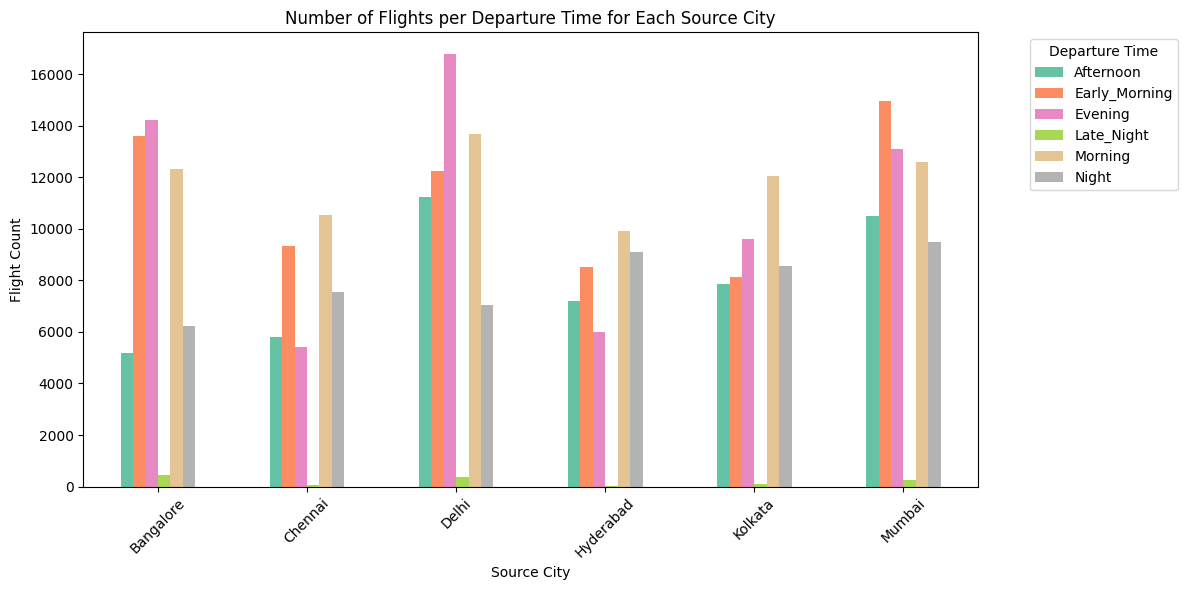

In [188]:
busier_origin_city.plot(kind="bar", figsize=(12,6), colormap="Set2")
plt.title("Number of Flights per Departure Time for Each Source City")
plt.xlabel("Source City")
plt.ylabel("Flight Count")
plt.xticks(rotation=45)
plt.legend(title="Departure Time", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Q5 Which airlines operate the Least unique routes?

In [ ]:
unique_routes_df = flight_df[["airline", "source_city", "destination_city"]].drop_duplicates()
unique_routes_count = unique_routes_df["airline"].value_counts()
print(unique_routes_count)

airline
AirAsia      30
Vistara      30
Indigo       30
GO_FIRST     30
Air_India    30
SpiceJet     27
Name: count, dtype: int64


# Q6 Do non-stop flights cost more than connecting ones for the same route?

In [224]:
flight_df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [340]:
flight_cost = flight_df.groupby(["airline","stops","class"])["price"].mean().reset_index(name="avg")
flight_cost.head(24)



,airline,stops,class,avg
0,AirAsia,one,Economy,4096.963741
1,AirAsia,two_or_more,Economy,4432.956367
2,AirAsia,zero,Economy,3747.960970
3,Air_India,one,Business,49311.461068
4,Air_India,one,Economy,7296.655117
5,Air_India,two_or_more,Business,57383.054795
6,Air_India,two_or_more,Economy,10841.422086
7,Air_India,zero,Business,25517.612820
8,Air_India,zero,Economy,4062.093675
9,GO_FIRST,one,Economy,5972.272755


Text(0.5, 0.98, 'Average Flight Price by Airline, Class, and Stops')

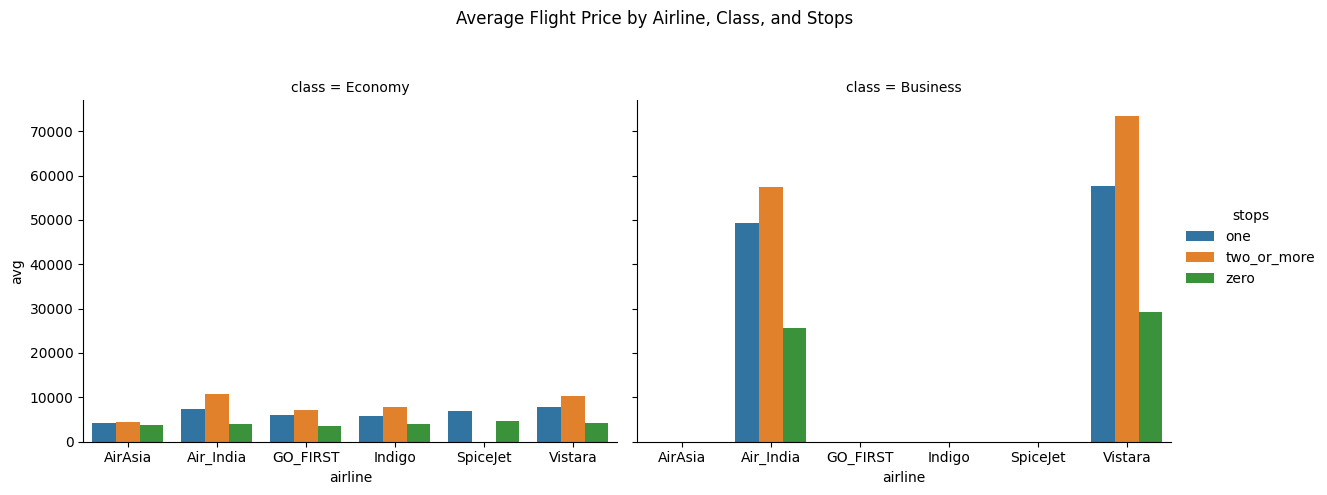

In [ ]:
sns.catplot(
    data=flight_cost,
    x="airline",
    y="avg",
    hue="stops",
    col="class",
    kind="bar",
    # palette="pastel",
    # palette = sns.color_palette("cubehelix", 6),
    # palette = sns.color_palette("Blues", 5),
    # palette = sns.color_palette("RdBu", 6),
    height=5,
    aspect=1.2

)
plt.subplots_adjust(top=0.8)
plt.suptitle("Average Flight Price by Airline, Class, and Stops")


# Q7 - What are the top 5 most frequent flight routes?

In [387]:
top_routes = flight_df.groupby(["source_city", "destination_city"]).size().reset_index(name="Count") # size sums up 
top_routes = top_routes.sort_values(by = "Count",ascending=False)
top_routes.head(10)


,source_city,destination_city,Count
14,Delhi,Mumbai,15289
27,Mumbai,Delhi,14809
10,Delhi,Bangalore,14012
1,Bangalore,Delhi,13756
4,Bangalore,Mumbai,12939
25,Mumbai,Bangalore,12885
29,Mumbai,Kolkata,12602
13,Delhi,Kolkata,11934
24,Kolkata,Mumbai,11467
11,Delhi,Chennai,10780


In [388]:
top_routes.tail()

,source_city,destination_city,Count
21,Kolkata,Chennai,6653
5,Chennai,Bangalore,6493
0,Bangalore,Chennai,6410
16,Hyderabad,Chennai,6395
7,Chennai,Hyderabad,6103


# Q8 Which source cities have the most departures?

In [366]:
departure_counts = flight_df["source_city"].value_counts()
departure_counts


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [461]:
arrival_counts = flight_df["destination_city"].value_counts()
arrival_counts

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

# Q9 Do last-minute bookings (low days left) cost more than early bookings?


In [405]:
flight_df["days_left"].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [408]:
bookings = flight_df.groupby("days_left")["price"].mean()
bookings

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

In [409]:
bookings = flight_df.groupby(["days_left","class"])["price"].mean()
bookings

days_left  class   
1          Business    65169.312030
           Economy     14613.179410
2          Business    60455.848506
           Economy     13980.828244
3          Business    60313.822331
                           ...     
47         Economy      4669.652956
48         Business    51558.758230
           Economy      4717.688994
49         Business    51124.505820
           Economy      4750.805113
Name: price, Length: 98, dtype: float64

In [414]:
bookings = flight_df.groupby(["airline","class","days_left"])["price"].mean().unstack()
bookings.head(20)

days_left                     1             2             3             4   \
airline   class                                                              
AirAsia   Economy   10867.710843   9374.676923   8732.798507   7198.103896   
Air_India Business  54773.491228  53322.816474  52147.544034  47553.787651   
          Economy   14873.096413  14759.303476  13766.672862  12034.028689   
GO_FIRST  Economy   11512.712500  12028.418440  10681.790419   7913.300518   
Indigo    Economy   13816.153477  12166.580488  11730.408882   8754.833100   
SpiceJet  Economy   13136.913043  11362.181818   9745.265432   7961.189055   
Vistara   Business  72966.177632  67369.095238  68298.627778  61802.760240   
          Economy   16163.021201  16157.299279  15428.491676  12742.253617   

days_left                     5             6             7             8   \
airline   class                                                              
AirAsia   Economy    8300.835821   7965.731844   8157.465409   8653.073298   
Air_India Business  47815.430322  47659.070359  48360.113569  48062.033537   
          Economy   11963.715708  11580.177149  11636.767621  11698.591002   
GO_FIRST  Economy    7348.612745   7163.321586   7871.295652   7525.713004   
Indigo    Economy    8518.105845   8376.468974   8467.246642   8363.209964   
SpiceJet  Economy    7656.860465   7455.419048   7717.963470   8177.954774   
Vistara   Business  60503.850400  56820.951510  57754.013281  55852.017843   
          Economy   11822.183703  11859.680654  11999.032624  11961.690202   

days_left                     9             10  ...            40  \
airline   class                                 ...                 
AirAsia   Economy    9036.846995  10112.173333  ...   2878.555556   
Air_India Business  47466.020588  47452.929191  ...  46494.751437   
          Economy   13210.672489  12791.479017  ...   4944.740777   
GO_FIRST  Economy    8764.186528   9371.480851  ...   5066.011029   
Indigo    Economy    9041.658120   8839.140496  ...   3250.798077   
SpiceJet  Economy    8351.107477   8162.170507  ...   5578.930108   
Vistara   Business  55920.316614  57999.664006  ...  53996.657576   
          Economy   12622.473988  12457.261628  ...   5817.047189   

days_left                     41            42            43            44  \
airline   class                                                              
AirAsia   Economy    2860.684783   2915.089674   3044.290411   3052.286486   
Air_India Business  46968.171965  46754.101920  47067.177273  46397.227405   
          Economy    5041.043311   5121.540698   5174.450635   5197.388303   
GO_FIRST  Economy    5090.395911   5103.033457   5140.260949   5123.278986   
Indigo    Economy    3276.566419   3195.755864   3450.530720   3514.146032   
SpiceJet  Economy    5554.584270   5550.704301   5556.288235   5598.994012   
Vistara   Business  54882.890494  54063.673748  54603.962150  54068.076923   
          Economy    5824.002063   5835.502778   5935.024289   5900.271623   

days_left                     45            46            47            48  \
airline   class                                                              
AirAsia   Economy    3083.741425   2847.257979   2827.714286   2836.822454   
Air_India Business  45715.747004  45615.619718  45711.877005  45537.382979   
          Economy    5197.624046   5016.071888   4992.824675   5020.788813   
GO_FIRST  Economy    5276.343413   5096.139955   5030.797727   5103.002315   
Indigo    Economy    3554.126163   3195.212766   3153.012448   3305.001034   
SpiceJet  Economy    5438.465278   5339.337931   5292.323741   5350.398601   
Vistara   Business  54567.533333  53970.156757  54494.711147  54193.401862   
          Economy    5973.332599   5827.618705   5824.593662   5815.998596   

days_left                     49  
airline   class                   
AirAsia   Economy    2854.608355  
Air_India Business  45694.097682  
          Economy    5129.364606  
GO_FIRST  

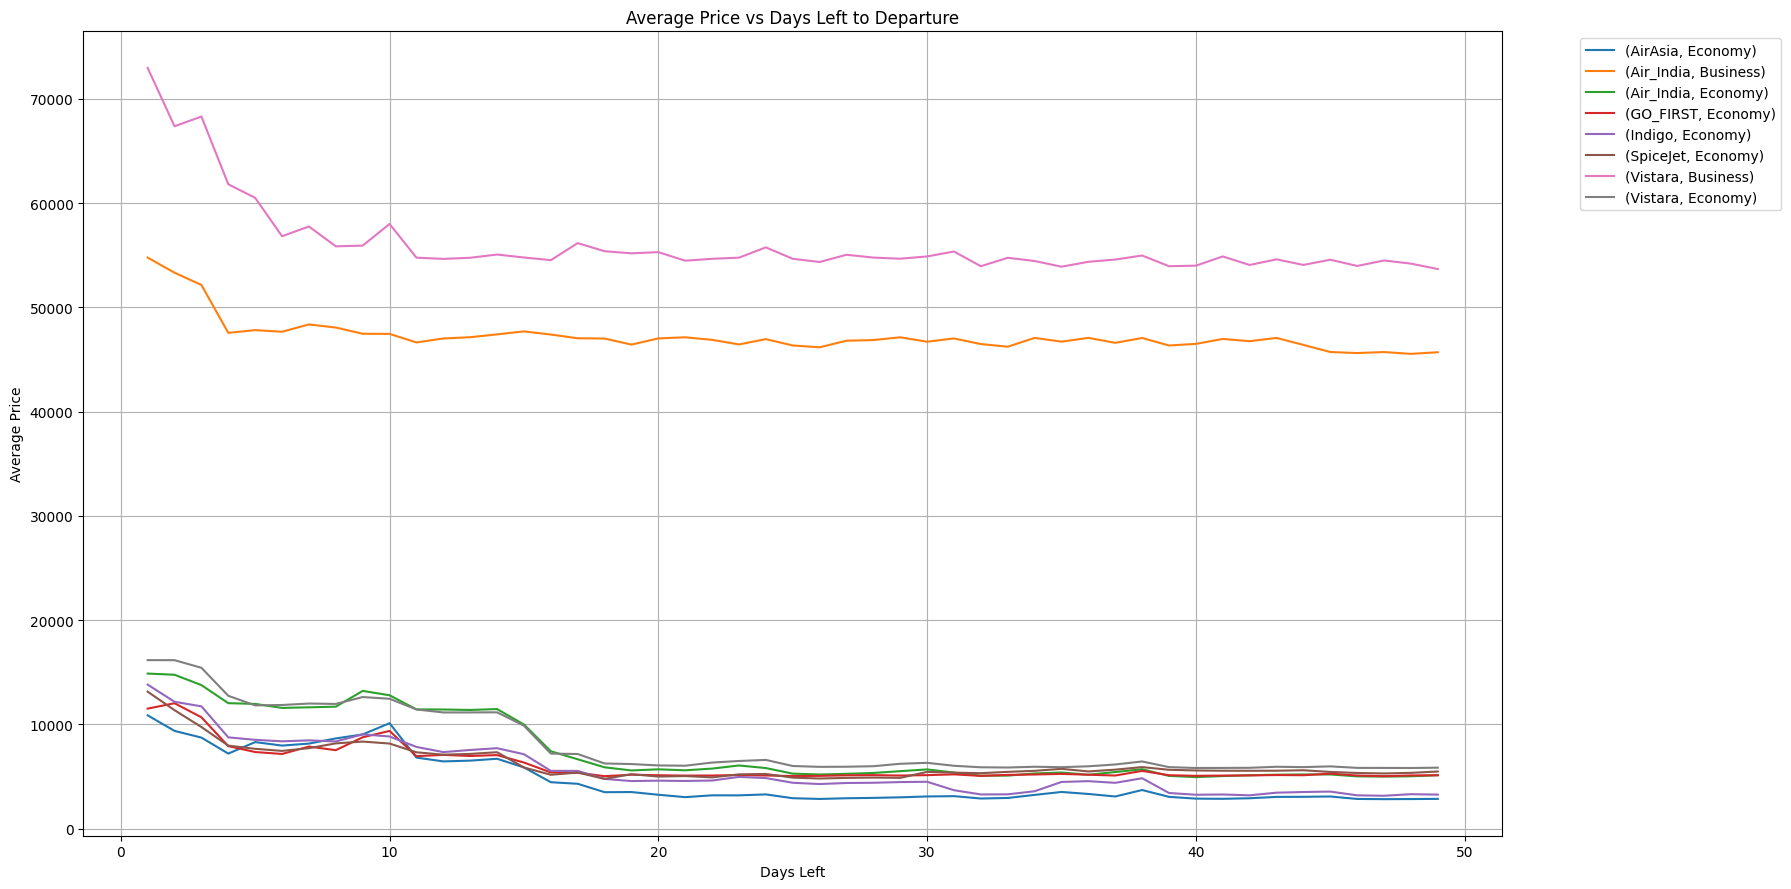

In [ ]:
bookings.T.plot(figsize=(18, 9))
plt.title("Average Price vs Days Left to Departure")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Q10 Do certain airlines dominate specific routes or regions?

In [428]:
route_counts = flight_df.groupby(["airline", "source_city", "destination_city"]).size().reset_index(name="count")
route_counts = route_counts.sort_values(by="count",ascending=False)
# route_counts[route_counts[["source_city","destination_city"]]]== ["Delhi","Mumbai"]
route_counts[(route_counts["source_city"] == "Delhi") & (route_counts["destination_city"] == "Mumbai")]


,airline,source_city,destination_city,count
161,Vistara,Delhi,Mumbai,5840
44,Air_India,Delhi,Mumbai,5007
104,Indigo,Delhi,Mumbai,1656
74,GO_FIRST,Delhi,Mumbai,1650
14,AirAsia,Delhi,Mumbai,632
134,SpiceJet,Delhi,Mumbai,504


In [429]:
route_counts[(route_counts["source_city"] == "Mumbai") & (route_counts["destination_city"] == "Chennai")]

,airline,source_city,destination_city,count
173,Vistara,Mumbai,Chennai,4614
56,Air_India,Mumbai,Chennai,3192
116,Indigo,Mumbai,Chennai,1787
26,AirAsia,Mumbai,Chennai,222
144,SpiceJet,Mumbai,Chennai,166
86,GO_FIRST,Mumbai,Chennai,149


In [430]:
route_counts[(route_counts["source_city"] == "Kolkata") & (route_counts["destination_city"] == "Bangalore")]

,airline,source_city,destination_city,count
167,Vistara,Kolkata,Bangalore,4404
50,Air_India,Kolkata,Bangalore,1959
110,Indigo,Kolkata,Bangalore,1487
20,AirAsia,Kolkata,Bangalore,898
80,GO_FIRST,Kolkata,Bangalore,801
138,SpiceJet,Kolkata,Bangalore,275


In [432]:
route_counts[(route_counts["source_city"] == "Bangalore") & (route_counts["destination_city"] == "Kolkata")]

,airline,source_city,destination_city,count
150,Vistara,Bangalore,Kolkata,4370
33,Air_India,Bangalore,Kolkata,2026
93,Indigo,Bangalore,Kolkata,1637
63,GO_FIRST,Bangalore,Kolkata,873
3,AirAsia,Bangalore,Kolkata,848
123,SpiceJet,Bangalore,Kolkata,274


In [462]:
revenue = flight_df.groupby(["airline","class"])["price"].sum()
revenue

airline    class   
AirAsia    Economy       65858089
Air_India  Business    1550516928
           Economy      351012862
GO_FIRST   Economy      130973972
Indigo     Economy      229580207
SpiceJet   Economy       55681482
Vistara    Business    3361297636
           Economy      525173099
Name: price, dtype: int64